# MSDS 7331 - Data Mining

# Assignment 1

## Kickstarter Project Prediction

by: Evangelos Giakoumakis, Ramin Farhanian, Bryan Cikatz

In [3]:
# loading the dataset
import os
cwd = os.getcwd()
cwd

'/notebook/DataMiningNotebooks-master'

In [5]:
    # loading the dataset
    import pandas as pd
    import numpy as np
    df = pd.read_csv('data/ks-projects-201612-cleaned.csv',  sep = ',')    

In [6]:
print(df.head())

   uniqueId                                              name   \
0      5971              An American Apocalypse: The Reckoning   
1     18520                                 Grandma's are Life   
2     21109                                               Meta   
3     21371                                  Water Powered Car   
4     24380  Puss N' Books: A relaxing cat cafe and bookstore.   

         category  main_category  currency          deadline     goal   \
0           Comics         Comics       USD    8/6/2012 20:00  48000.0   
1      World Music          Music       USD  11/18/2016 15:32  15000.0   
2  Performance Art            Art       GBP    5/6/2015 23:00    150.0   
3       Technology     Technology       USD   8/10/2016 19:02  75000.0   
4           Spaces           Food       USD  11/26/2015 17:25  20000.0   

          launched   pledged       state   backers  country   
0    6/8/2012 18:46     376.0      failed         7       US  
1  10/19/2016 15:32      62.0   

In [7]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 12 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.3+ MB
None


In [9]:
print (df.dtypes)

uniqueId            int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal              float64
launched           object
pledged           float64
state              object
backers             int64
country            object
dtype: object


In [10]:
df.describe()

,uniqueId,goal,pledged,backers
count,3.195560e+05,3.195560e+05,3.195560e+05,319556.000000
mean,1.074799e+09,4.762898e+04,8.768322e+03,102.767775
std,6.193688e+08,1.145902e+06,9.008106e+04,940.051571
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000
25%,5.374245e+08,2.000000e+03,3.000000e+01,2.000000
50%,1.075709e+09,5.000000e+03,6.100000e+02,12.000000
75%,1.611023e+09,1.500000e+04,3.940000e+03,55.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000


Column Metadata

column name                         Description                Type
uniqueID                            Id of project              String
name         Title of the project
String
category
Kickstarter sub category
String
main_category
Kickstarter main category
String
currency
Intial currency of the project
String
deadline
Project deadline
DateTime
goal
Project goal
Numeric
launched
Project launch date
DateTime
pledged
Amount pledge in inital currency
Numeric
state
Project current state
String
backers
Number of backers
Numeric
country
Country of project creator
String
usd pledged
Kickstarter conversion of pledged amount in USD
Numeric


In [11]:
# make state boolean so we can see the percentage of success/failures
df['bl_states'] = False

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 13 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
bl_states         319556 non-null bool
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 29.6+ MB


,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,bl_states
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,7,US,False
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,4,US,False
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,11,GB,False
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,4,US,False
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,18,US,False


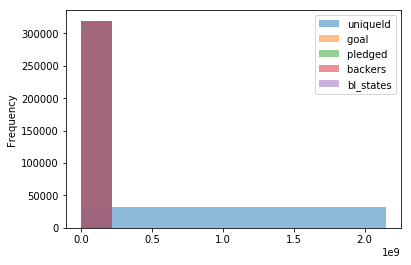

In [12]:
# plot something
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.figure(); 
df.plot(kind='hist', alpha=0.5)